In [190]:
#https://www.kaggle.com/apapiu/regularized-linear-models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [191]:
train = pd.read_csv(r"C:\Users\Owner\Desktop\School\EEE 511\Final Project\FpdTrain.csv")
test = pd.read_csv(r"C:\Users\Owner\Desktop\School\EEE 511\Final Project\FpdTest.csv")

In [192]:
train.head()

,QUEUE_TIME,PROCESS_TIME,TPT,OPERATION,QTY,DOW,SHIFT,SHIFT_TYPE,OWNER,BUILD_PRIORITY,BUILD_CATEGORY,BUILD_TYPE,PLATFORM_NAME,PRODUCT_FAMILY,PACKAGE_NAME,PKGDEVREVSTEP,PRODUCT
0,0.796444,0.060000,0.856444,1770,798,6,2,1,7,2,4,2,35,329,7,423,1633
1,0.778222,0.319556,1.097778,1388,140,6,2,1,4,3,2,4,35,222,34,2733,5706
2,14.752889,0.001778,14.754667,7168,114,6,2,1,4,3,2,4,35,222,34,2733,5706
3,0.010222,4.697333,4.707556,1418,71,6,2,1,3,3,2,1,36,78,19,882,1634
4,2.088889,1.193778,3.282667,2034,143,6,2,1,4,3,2,4,35,384,7,424,4034


In [193]:
all_data = pd.concat((train.loc[:,'OPERATION':'PRODUCT'],
                      test.loc[:,'OPERATION':'PRODUCT']))

In [194]:
all_data.head()

,OPERATION,QTY,DOW,SHIFT,SHIFT_TYPE,OWNER,BUILD_PRIORITY,BUILD_CATEGORY,BUILD_TYPE,PLATFORM_NAME,PRODUCT_FAMILY,PACKAGE_NAME,PKGDEVREVSTEP,PRODUCT
0,1770,798,6,2,1,7,2,4,2,35,329,7,423,1633
1,1388,140,6,2,1,4,3,2,4,35,222,34,2733,5706
2,7168,114,6,2,1,4,3,2,4,35,222,34,2733,5706
3,1418,71,6,2,1,3,3,2,1,36,78,19,882,1634
4,2034,143,6,2,1,4,3,2,4,35,384,7,424,4034


In [195]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.QUEUE_TIME

In [196]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [197]:
model_ridge = Ridge()

In [198]:
alphas = [0.00000001,0.000001,0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15,30,45]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

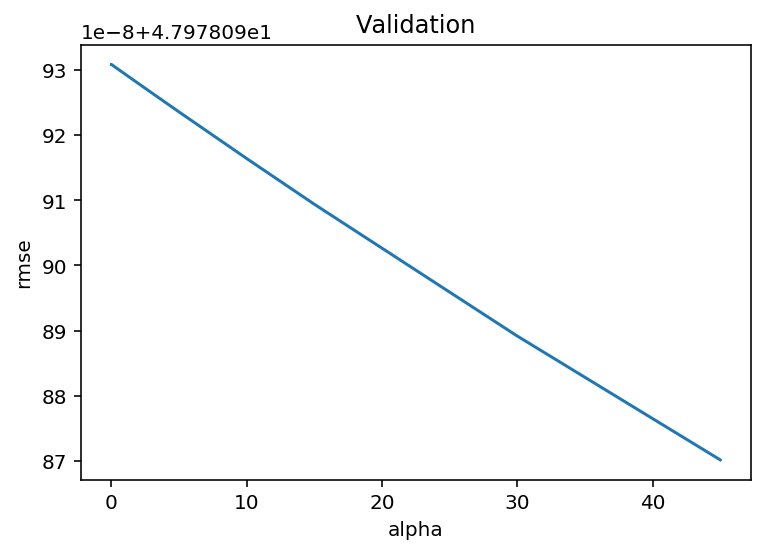

In [199]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [200]:
cv_ridge.min()

47.9780908701347

In [201]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [202]:
rmse_cv(model_lasso).mean()

47.97808670856051

In [203]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [204]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 0 variables


In [205]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Variable Coefficients')

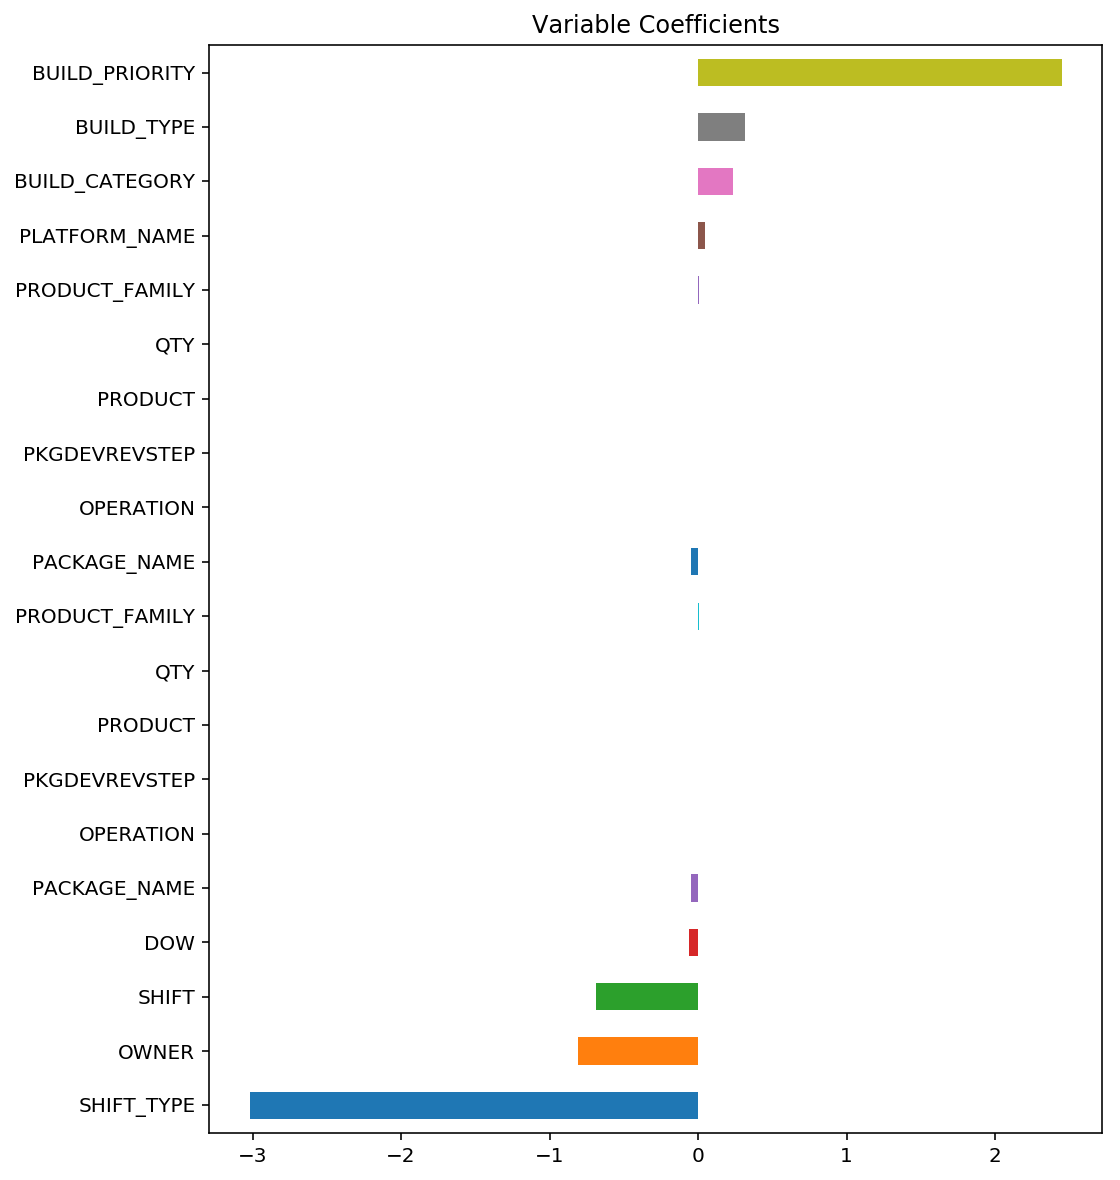

In [206]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Variable Coefficients")

In [207]:
import xgboost as xgb

In [208]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1, "silent":1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

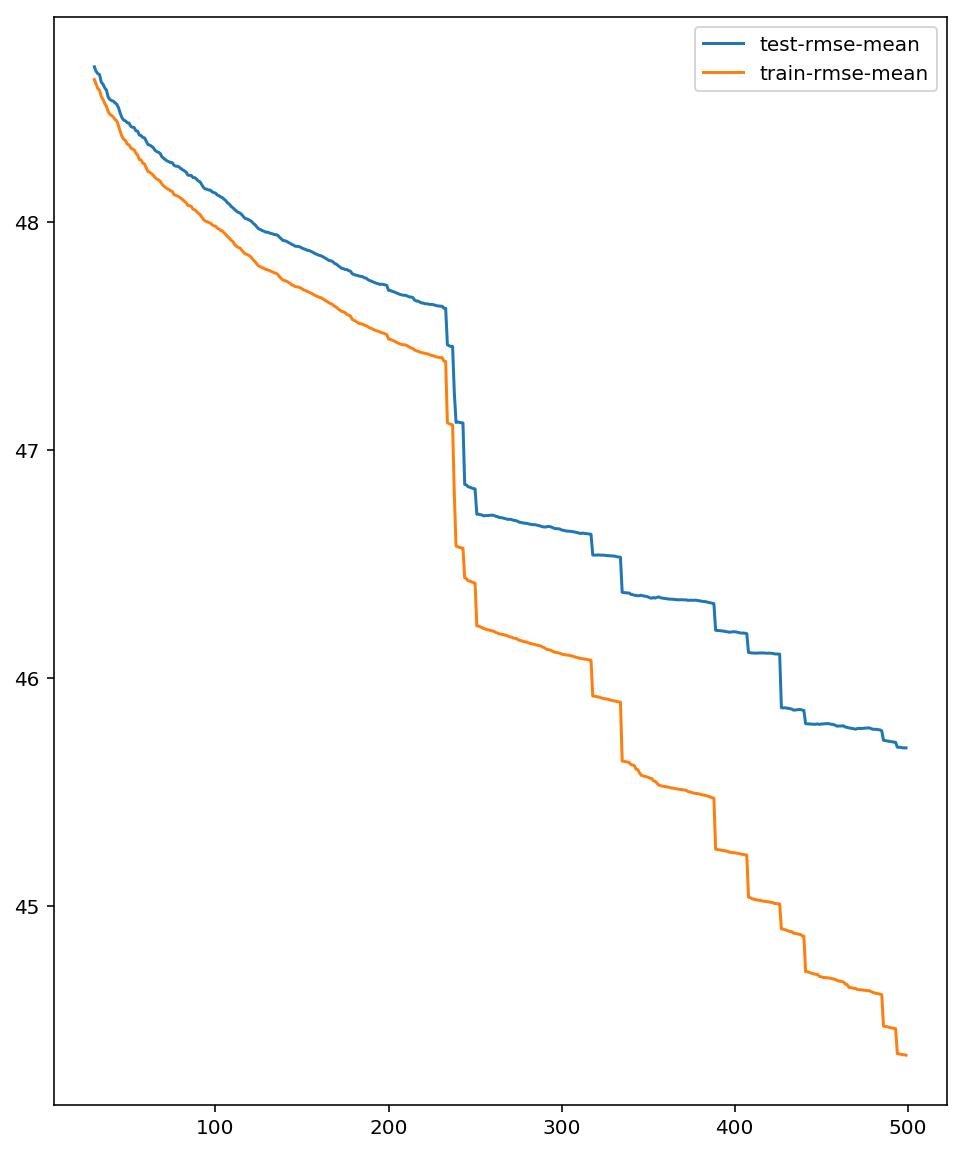

In [209]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()